Universidade de Brasília - UnB

Campus UnB Gama - FGA

CURSO: Engenharia Eletrônica

DISCIPLINA: Processamento Digital de Sinais

PROFESSOR: Marcelino Monteiro de Andrade, Dr.

Fundamentos das Imagens Digitais III

In [1]:
%matplotlib notebook 
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [ ]:
#Resolução Espacial

img = cv2.imread('Eu.JPG')
b,g,r = cv2.split(img)

fator=15

fig = plt.subplots(figsize=(10,10))

for fig, fator in zip(range(1,5), [1, 2 , 35, 60]):

    ax1=plt.subplot(2, 2, fig)  
    imr = cv2.resize(r,(int(r.shape[0]/fator),int(r.shape[1]/fator)))
    ax1.imshow(cv2.cvtColor(imr, cv2.COLOR_BGR2RGB))
    ax1.set_title(str(imr.shape[0])+ ' x ' +str(imr.shape[1]) )


In [ ]:
#histograma
img = cv2.imread('Eu.JPG')
color = ('b','g','r')
fig = plt.subplots(figsize=(5,5))

ax=plt.subplot(2, 1, 1)  

ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

ax=plt.subplot(2, 1, 2)  

for i,col in enumerate(color):
     histr = cv2.calcHist([img],[i],None,[256],[0,256])
     ax.plot(histr,color = col)
   #  ax.xlim([0,256])
plt.show()

In [ ]:
#equalização de histograma

img = cv2.imread('image1.jpg',0)
equ = cv2.equalizeHist(img)
#res = np.hstack((img,equ)) #stacking images side-by-side
%matplotlib notebook 
fig = plt.subplots(figsize=(8,8))
ax=plt.subplot(2, 2, 1)  
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

ax=plt.subplot(2, 2, 2)  
ax.imshow(cv2.cvtColor(equ, cv2.COLOR_BGR2RGB))


ax=plt.subplot(2, 2, 3)  

hist,bins = np.histogram(img.flatten(),256,[0,256])
 
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
 
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

ax=plt.subplot(2, 2, 4)  

hist,bins = np.histogram(equ.flatten(),256,[0,256])
 
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
 
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


In [ ]:
img[0:5,0:5]

In [ ]:
#imagem negativa
imgn = (255-img)

fig = plt.subplots(figsize=(8,8))
ax=plt.subplot(2, 2, 1)  
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

ax=plt.subplot(2, 2, 2)  
ax.imshow(cv2.cvtColor(imgn, cv2.COLOR_BGR2RGB))


ax=plt.subplot(2, 2, 3)  

hist,bins = np.histogram(img.flatten(),256,[0,256])
 
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
 
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

ax=plt.subplot(2, 2, 4)  

hist,bins = np.histogram(imgn.flatten(),256,[0,256])
 
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
 
plt.plot(cdf_normalized, color = 'b')
plt.hist(imgn.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


In [ ]:
#imagem binária
imgb = img.copy()

limiar=12
imgb[imgb<limiar]=0
imgb[imgb>=limiar]=255

fig = plt.subplots(figsize=(10,5))
ax=plt.subplot(1, 2, 1)  
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

ax=plt.subplot(1, 2, 2)  
ax.imshow(cv2.cvtColor(imgb, cv2.COLOR_BGR2RGB))



In [ ]:
mask

In [ ]:

# import the necessary packages
from skimage.exposure import rescale_intensity
import numpy as np
import argparse
import cv2

<IPython.core.display.Javascript object>


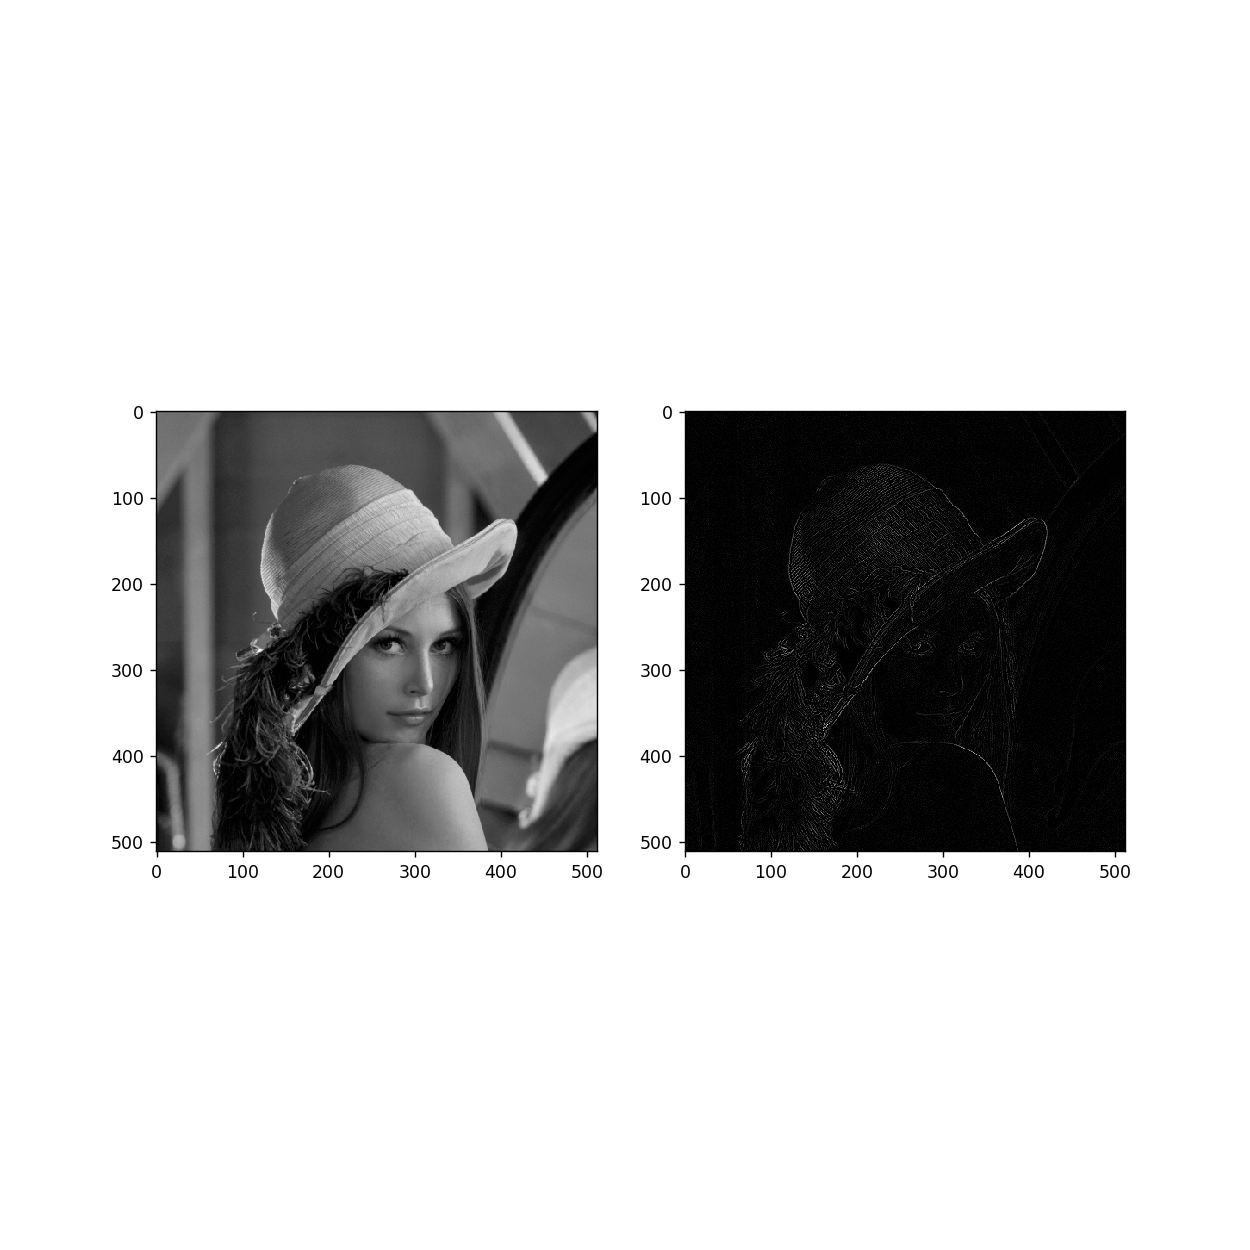

In [12]:
image = cv2.imread('image1.jpg',0)

image = cv2.resize(image,(512,512))
#image=image[:,:,2]
output = image.copy()

d=11
mean=np.ones([d,d])/(d**2)
sharpen = np.array(([0, -1, 0],[-1, 5, -1],[0, -1, 0]), dtype="int")
laplacian = np.array(([0, 1, 0],[1, -4, 1],[0, 1, 0]), dtype="int")
sobelX = np.array(([-1, 0, 1],[-2, 0, 2],[-1, 0, 1]), dtype="int")
sobelY = np.array(([-1, -2, -1],[0, 0, 0],[1, 2, 1]), dtype="int")



kernel=laplacian






(iH, iW) = image.shape[:2]
(kH, kW) = kernel.shape[:2]
pad = (kW - 1) // 2


for y in np.arange(pad, iH - pad):
    for x in np.arange(pad, iW - pad):
 
            roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]

            if roi.shape == kernel.shape:
                k = (roi * kernel).sum()
                output[y - pad, x - pad] = int(k)
            
fig = plt.subplots(figsize=(10,10))

ax1=plt.subplot(1, 2, 1)  
ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


ax2=plt.subplot(1, 2, 2)  

#
#output[output<0]=np.abs(output[output<0])

#ax2.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

ax2.imshow(cv2.cvtColor(cv2.filter2D(image, -1, kernel), cv2.COLOR_BGR2RGB))


<IPython.core.display.Javascript object>


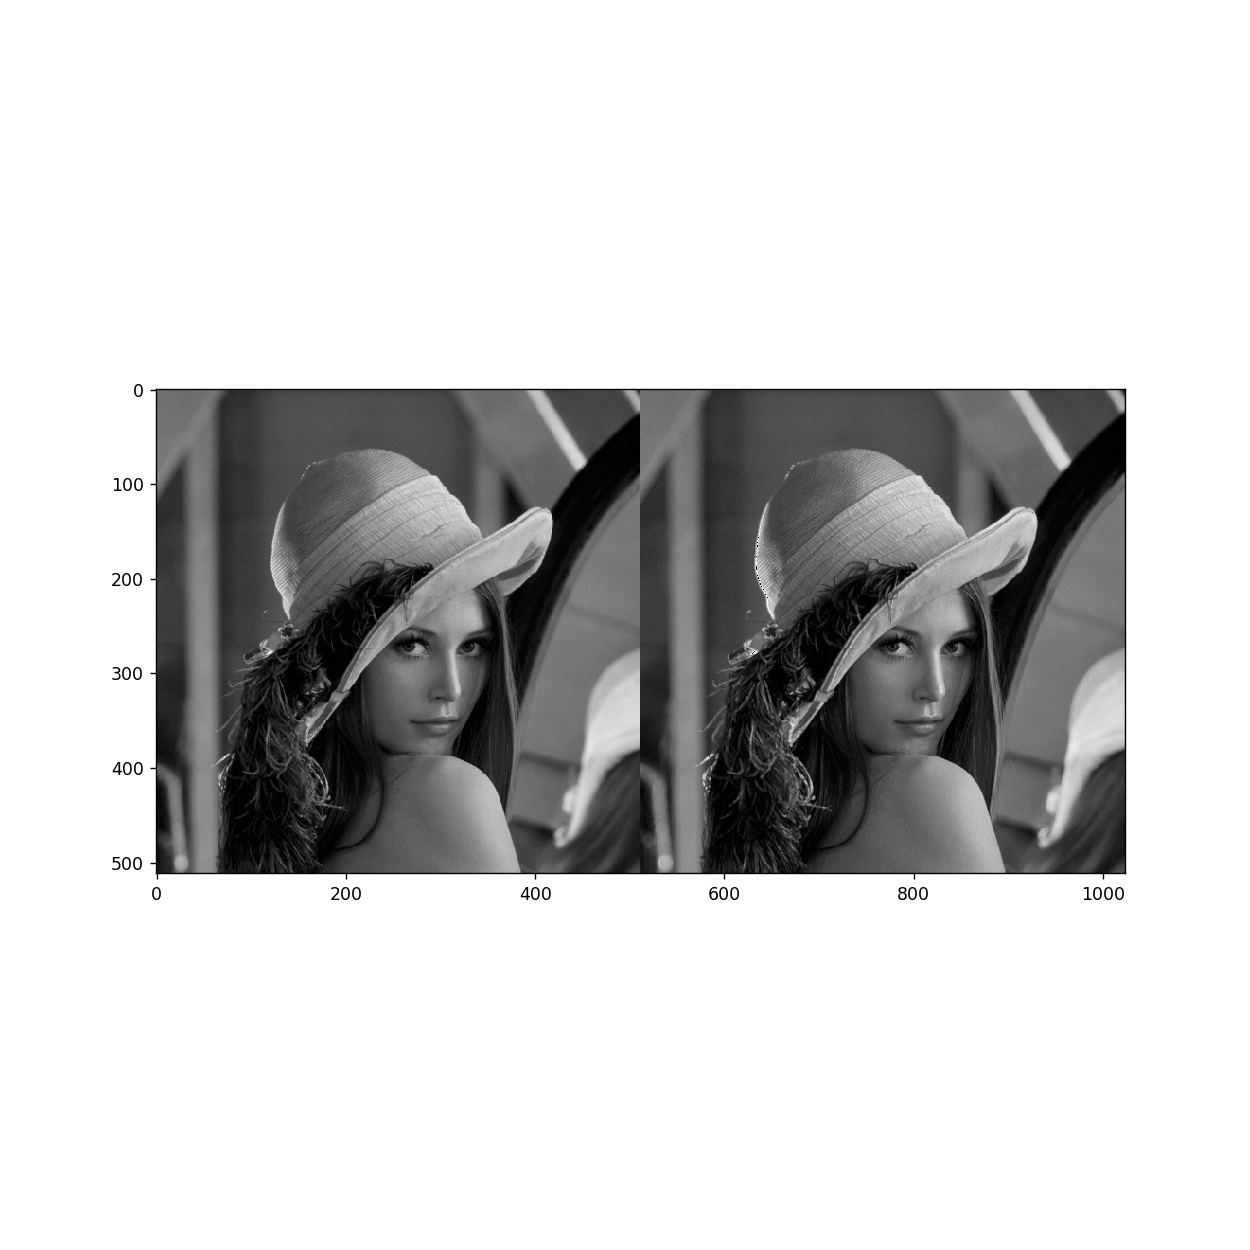

In [17]:
#Auto Reforço

image = cv2.imread('image1.jpg',0)

image = cv2.resize(image,(512,512))
#image=image[:,:,2]
output = image.copy()

d=11
mean=np.ones([d,d])/(d**2)
sharpen = np.array(([0, -1, 0],[-1, 5, -1],[0, -1, 0]), dtype="int")
laplacian = np.array(([0, 1, 0],[1, -4, 1],[0, 1, 0]), dtype="int")
sobelX = np.array(([-1, 0, 1],[-2, 0, 2],[-1, 0, 1]), dtype="int")
sobelY = np.array(([-1, -2, -1],[0, 0, 0],[1, 2, 1]), dtype="int")



kernel=sobelX






(iH, iW) = image.shape[:2]
(kH, kW) = kernel.shape[:2]
pad = (kW - 1) // 2


for y in np.arange(pad, iH - pad):
    for x in np.arange(pad, iW - pad):
 
            roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]

            if roi.shape == kernel.shape:
                k = (roi * kernel).sum()
                output[y - pad, x - pad] = int(k)
            
fig = plt.subplots(figsize=(10,10))

ax1=plt.subplot(1, 1, 1)  

res = np.hstack((image,image+np.array(cv2.filter2D(image, -1, kernel)/5, dtype="uint8")))


ax1.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
